<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/ABSA/textsent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data upload

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from datasets import load_dataset

ds = load_dataset("jordiclive/FABSA")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/747k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/105k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/158k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7930 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1057 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1587 [00:00<?, ? examples/s]

In [3]:
print(ds)


DatasetDict({
    train: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 7930
    })
    validation: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1057
    })
    test: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1587
    })
})


In [4]:
import pandas as pd
import numpy as np

dff = pd.DataFrame(ds['train'])

In [5]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


In [6]:
dff.shape

(7930, 7)

In [7]:
dff['data_source'].value_counts()

,count
data_source,
Google Play,4612
Apple Store,1870
Trustpilot,1448


In [8]:
dff['industry'].value_counts()

,count
industry,
Fashion,2161
Price Comparison,1157
Groceries,1021
Trading,1021
Travel Booking,973
Banking,913
Ride Hailing,383
Information Technology,141
Consulting,81


In [9]:
dff.head(5)

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
# spell = SpellChecker()
stop_words = set(stopwords.words('english'))

def clean(text):
    """
    removing URLs, HTML tags, special characters, and digits.
    """
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

def normalize(text):
    """
    converting text to lowercase.
    """
    return text.lower()

# def spelling(text):
#     """
#     fix typos, missplellings.
#     """
#     corrected_text = []
#     for word in text.split():
#         correction = spell.correction(word)
#         if correction is None:
#             corrected_text.append(word)  # Use the original word if no correction is found
#         else:
#             corrected_text.append(correction)  # Use the corrected word
#     return ' '.join(corrected_text)

def lemmatize(text):
    """
    lemmatize w/NLTK WordNetLemmatizer.
    """
    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize each word and remove stop words
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return lemmatized_text

def preprocess(text):
    """
    perform all.
    """
    text = clean(text)
    # text = spelling(text)
    text = normalize(text)
    text = lemmatize(text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Spelling corrections have distorted some words' meaning.

In [11]:
dff.loc[:, 'clean'] = dff['text'].apply(preprocess)



In [12]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan...",experience around parking forum review based s...
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info


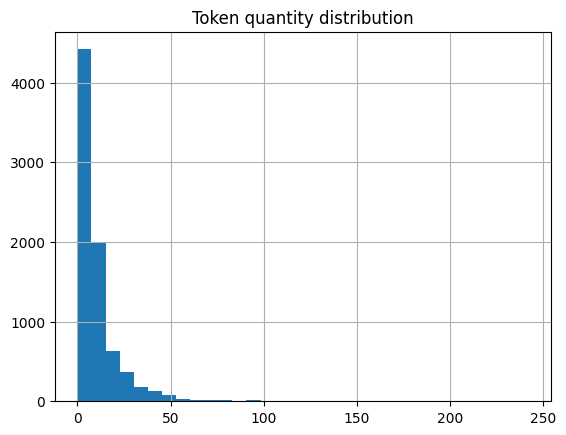

In [13]:
from matplotlib import pyplot as plt
dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))
dff["tokens"].hist(bins=32)
plt.title("Token quantity distribution");

In [14]:
def clean_label_codes(label_codes_series):
    unique_codes = set()

    for label_codes in label_codes_series:
        if isinstance(label_codes, str):
            label_codes = label_codes.replace("'", "").replace("[", "").replace("]", "").strip()
            codes = label_codes.split(',')
            for code in codes:
                code = code.strip()
                parts = code.rsplit('.', 1)
                if len(parts) == 2:
                    clean_code = parts[0]
                    unique_codes.add(clean_code)
                else:
                    print(f"Unexpected format: {code}")
        else:
            print(f"Unexpected data type: {label_codes}")

    return unique_codes

unique_labels = clean_label_codes(dff['label_codes'])

unique_labels_list = list(unique_labels)
print(unique_labels_list)
len(unique_labels_list)

['staff-support.email', 'staff-support.attitude-of-staff', 'purchase-booking-experience.ease-of-use', 'value.price-value-for-money', 'company-brand.competitor', 'staff-support.phone', 'logistics-rides.speed', 'company-brand.general-satisfaction', 'account-management.account-access', 'company-brand.reviews', 'online-experience.app-website', 'value.discounts-promotions']


12

In [15]:
def aspects(label_code):
    labels = label_code.split(',')
    first_elements = [label.split('.')[0].replace('-', ' ').replace('[', ' ').replace("'", ' ').strip() for label in labels]
    return first_elements

def unique_aspects(label_code):
    labels = label_code.split(',')
    first_elements = [label.split('.')[0].replace('-', ' ').replace('[', ' ').replace("'", ' ').strip() for label in labels]
    unique_elements = list(set(first_elements))
    return unique_elements

dff['aspects'] = dff['label_codes'].apply(aspects)

dff['unique_aspects'] = dff['label_codes'].apply(unique_aspects)

dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[company brand, staff support]"
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand]
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take,2,[company brand],[company brand]
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[company brand, logistics rides, online experi..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info,3,[company brand],[company brand]


In [16]:
import ast
dff.loc[:,'label_codes'] = dff['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
def split_label_sentiment(label_code):
    if '.' in label_code:
        label, sentiment = label_code.rsplit('.', 1)
        return label.replace("-", " "), sentiment  # Replace '-' with space for label
    return label_code, None

def extract_sentiments(label_codes):
    label_sentiments = [split_label_sentiment(label) for label in label_codes]  # Process each label
    sentiments = [int(sentiment) if sentiment in ['-1', '0', '1'] else None for _, sentiment in label_sentiments]  # Extract and convert sentiments
    return sentiments

dff['sentiments'] = dff['label_codes'].apply(lambda x: extract_sentiments(x))

In [17]:
dff[['label_codes', 'aspects','sentiments']].head()


,label_codes,aspects,sentiments
0,"[staff-support.attitude-of-staff.-1, company-b...","[staff support, company brand, company brand]","[-1, -1, -1]"
1,"[company-brand.general-satisfaction.1, company...","[company brand, company brand]","[1, 1]"
2,[company-brand.general-satisfaction.-1],[company brand],[-1]
3,"[logistics-rides.speed.-1, online-experience.a...","[logistics rides, online experience, company b...","[-1, -1, -1]"
4,[company-brand.general-satisfaction.1],[company brand],[1]


In [18]:
def assign_positive(sentiments):
    sentiment_sum = sum(sentiments)
    return 1 if sentiment_sum >= 0 else 0

dff['positive'] = dff['sentiments'].apply(assign_positive)
dff[['label_codes', 'sentiments', 'positive']].head(15)


,label_codes,sentiments,positive
0,"[staff-support.attitude-of-staff.-1, company-b...","[-1, -1, -1]",0
1,"[company-brand.general-satisfaction.1, company...","[1, 1]",1
2,[company-brand.general-satisfaction.-1],[-1],0
3,"[logistics-rides.speed.-1, online-experience.a...","[-1, -1, -1]",0
4,[company-brand.general-satisfaction.1],[1],1
5,"[company-brand.reviews.-1, online-experience.a...","[-1, -1]",0
6,"[purchase-booking-experience.ease-of-use.1, on...","[1, 1, 1]",1
7,[company-brand.general-satisfaction.1],[1],1
8,"[staff-support.attitude-of-staff.1, purchase-b...","[1, 1, 1]",1
9,[online-experience.app-website.1],[1],1


In [19]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects,sentiments,positive
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","[staff-support.attitude-of-staff.-1, company-b...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[company brand, staff support]","[-1, -1, -1]",0
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","[company-brand.general-satisfaction.1, company...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand],"[1, 1]",1
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",[company-brand.general-satisfaction.-1],sometimes take,2,[company brand],[company brand],[-1],0
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","[logistics-rides.speed.-1, online-experience.a...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[company brand, logistics rides, online experi...","[-1, -1, -1]",0
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],easy load info,3,[company brand],[company brand],[1],1


In [20]:
dff['positive'].value_counts()

,count
positive,
1,5744
0,2186


In [21]:
dummies = pd.get_dummies(dff['unique_aspects'].explode()).groupby(level=0).sum()

dffin = pd.concat([dff, dummies], axis=1)
dffin.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,unique_aspects,sentiments,positive,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","[staff-support.attitude-of-staff.-1, company-b...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]","[company brand, staff support]","[-1, -1, -1]",0,0,1,0,0,0,1,0
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","[company-brand.general-satisfaction.1, company...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",[company brand],"[1, 1]",1,0,1,0,0,0,0,0
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",[company-brand.general-satisfaction.-1],sometimes take,2,[company brand],[company brand],[-1],0,0,1,0,0,0,0,0
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","[logistics-rides.speed.-1, online-experience.a...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...","[company brand, logistics rides, online experi...","[-1, -1, -1]",0,0,1,1,1,0,0,0
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],easy load info,3,[company brand],[company brand],[1],1,0,1,0,0,0,0,0


In [22]:
dffin.shape

(7930, 20)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(dffin["clean"])

In [24]:
print(X_train)

  (0, 5467)	0.07382215915911289
  (0, 6613)	0.08847805817601374
  (0, 7509)	0.06572963587565972
  (0, 5287)	0.0625660410638438
  (0, 1930)	0.09387850483952884
  (0, 3885)	0.09816508050915038
  (0, 571)	0.05619116862969087
  (0, 7118)	0.07686353299794178
  (0, 6748)	0.07618123198379911
  (0, 248)	0.048328429430508864
  (0, 676)	0.09816508050915038
  (0, 486)	0.07686353299794178
  (0, 5498)	0.09083713100069996
  (0, 899)	0.09816508050915038
  (0, 160)	0.08847805817601374
  (0, 3206)	0.0481871534339761
  (0, 5130)	0.08655055533107844
  (0, 3028)	0.04809400748855607
  (0, 256)	0.09816508050915038
  (0, 5121)	0.06953558348949136
  (0, 6467)	0.07493603015300648
  (0, 5153)	0.08115010866756331
  (0, 3226)	0.07234459640526779
  (0, 2445)	0.053325789283049055
  (0, 2106)	0.09816508050915038
  :	:
  (7924, 3934)	0.22974266575449392
  (7924, 3031)	0.20897511246546385
  (7924, 2058)	0.1321476349765099
  (7924, 2670)	0.2358738053576437
  (7925, 2308)	0.412746545649335
  (7925, 2962)	0.4557919720291

In [25]:
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('-1', -1)
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('1', 1)
# exploded_df['sentiment'] = exploded_df['sentiment'].replace('0', 0)


y_train = dffin['positive'].values

In [26]:
print(y_train)

[0 1 0 ... 1 1 1]


class

In [27]:
# import ast
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')

# # Setup
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

# class DfProcessor:
#     def __init__(self, df):
#         self.df = df
#         self.vectorizer = TfidfVectorizer(
#             stop_words='english',
#             max_df=0.95,
#             min_df=5,
#             ngram_range=(1, 2)
#         )

#     def clean(self, text):
#         """
#         Remove URLs, HTML tags, special characters, digits, and extra whitespace.
#         """
#         text = re.sub(r'http\S+|<.*?>|[^a-zA-Z\s]', '', text)  # Remove URLs, HTML, and special characters
#         text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
#         return text

#     def normalize(self, text):
#         """
#         Convert text to lowercase.
#         """
#         return text.lower()

#     def lemmatize(self, text):
#         """
#         Tokenize, remove stopwords, and lemmatize text.
#         """
#         words = word_tokenize(text)
#         filtered_words = [word for word in words if word not in stop_words]
#         lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in filtered_words])
#         return lemmatized_text

#     def preprocess_text(self, text):
#         """
#         Full text preprocessing pipeline.
#         """
#         text = self.clean(text)
#         text = self.normalize(text)
#         text = self.lemmatize(text)
#         return text

#     def preprocess_text_column(self):
#         """
#         Apply text preprocessing to the 'text' column.
#         """
#         self.df['clean'] = self.df['text'].apply(self.preprocess_text)

#     def preprocess_tfidf(self):
#         """
#         Apply TF-IDF vectorization and filter out rare tokens.
#         """
#         X = self.vectorizer.fit_transform(self.df['clean'])
#         tokens = self.vectorizer.get_feature_names_out()
#         X_filtered = filter_rare_tokens(pd.DataFrame(X.toarray(), columns=tokens))
#         return X_filtered

#     def aspects(self, label_codes):
#         """
#         Extract the first part of each label code.
#         """
#         first_elements = [label.split('.')[0].replace('-', ' ').strip() for label in label_codes]
#         return first_elements

#     def unique_aspects(self, label_codes):
#         """
#         Find unique aspects from label codes.
#         """
#         first_elements = self.aspects(label_codes)
#         unique_elements = list(set(first_elements))
#         return unique_elements

#     def process_label_codes(self):
#         """
#         Convert string representation of label codes to actual lists.
#         """
#         self.df['label_codes'] = self.df['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x else [])

#     def split_label_sentiment(self, label_code):
#         """
#         Split label code into label and sentiment.
#         """
#         if '.' in label_code:
#             label, sentiment = label_code.rsplit('.', 1)
#             return label.replace("-", " "), sentiment
#         return label_code, None

#     def extract_sentiments(self, label_codes):
#         """
#         Extract sentiments from label codes.
#         """
#         return [int(self.split_label_sentiment(label)[1]) if self.split_label_sentiment(label)[1] in ['-1', '0', '1'] else None for label in label_codes]

#     def assign_positive(self, sentiments):
#         """
#         Assign a positive label based on the sum of sentiments.
#         """
#         sentiment_sum = sum([s for s in sentiments if s is not None])
#         return 1 if sentiment_sum >= 0 else 0

#     def create_aspect_columns(self):
#         """
#         Create 'aspects' and 'unique_aspects' columns.
#         """
#         self.df['aspects'] = self.df['label_codes'].apply(self.aspects)
#         self.df['unique_aspects'] = self.df['label_codes'].apply(self.unique_aspects)

#     def create_sentiment_columns(self):
#         """
#         Create 'sentiments' and 'positive' columns.
#         """
#         self.df['sentiments'] = self.df['label_codes'].apply(self.extract_sentiments)
#         self.df['positive'] = self.df['sentiments'].apply(self.assign_positive)

#     def create_dummy_variables(self):
#         """
#         Create dummy variables from 'unique_aspects' and add to DataFrame.
#         """
#         if 'unique_aspects' in self.df.columns:
#             dummies = pd.get_dummies(self.df['unique_aspects'].explode()).groupby(level=0).sum()
#             self.df = self.df.join(dummies, how='left')

#     def process(self):
#         """
#         Process the entire DataFrame and generate necessary columns.
#         """
#         self.preprocess_text_column()
#         X_filtered = self.preprocess_tfidf()
#         self.df = pd.concat([self.df.reset_index(drop=True), X_filtered], axis=1)
#         self.process_label_codes()
#         self.create_aspect_columns()
#         self.create_sentiment_columns()
#         self.create_dummy_variables()
#         return self.df


In [28]:
import ast
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

class DataProcessor:
    def __init__(self, df):
        self.df = df

    # Text cleaning function: remove URLs, HTML tags, special characters, and digits
    def clean(self, text):
        text = re.sub(r'http\S+', '', text)        # Remove URLs
        text = re.sub(r'<.*?>', '', text)          # Remove HTML tags
        text = re.sub(r'[^a-zA-Z\s]', '', text)    # Remove special characters and digits
        return text

    # Text normalization function: convert text to lowercase
    def normalize(self, text):
        return text.lower()

    # Lemmatize text using NLTK WordNetLemmatizer
    def lemmatize(self, text):
        words = word_tokenize(text)
        lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
        return lemmatized_text

    # Full text preprocessing pipeline
    def preprocess_text(self, text):
        text = self.clean(text)
        text = self.normalize(text)
        text = self.lemmatize(text)
        return text

    # Apply text preprocessing to the 'text' column
    def preprocess_text_column(self):
        self.df['clean'] = self.df['text'].apply(self.preprocess_text)

    # Method to process aspects by extracting the first part of each label
    def aspects(self, label_codes):
        first_elements = [label.split('.')[0].replace('-', ' ').strip() for label in label_codes]
        return first_elements

    # Method to find unique aspects
    def unique_aspects(self, label_codes):
        first_elements = [label.split('.')[0].replace('-', ' ').strip() for label in label_codes]
        unique_elements = list(set(first_elements))
        return unique_elements

    # Method to process label codes (convert string representation of list to an actual list)
    def process_label_codes(self):
        self.df.loc[:, 'label_codes'] = self.df['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Method to split label and sentiment
    def split_label_sentiment(self, label_code):
        if '.' in label_code:
            label, sentiment = label_code.rsplit('.', 1)
            return label.replace("-", " "), sentiment  # Replace '-' with space for label
        return label_code, None

    # Method to extract sentiments from label_codes
    def extract_sentiments(self, label_codes):
        label_sentiments = [self.split_label_sentiment(label) for label in label_codes]  # Process each label
        sentiments = [int(sentiment) if sentiment in ['-1', '0', '1'] else None for _, sentiment in label_sentiments]  # Extract and convert sentiments
        return sentiments

    # Method to assign a 'positive' column based on sentiments sum
    def assign_positive(self, sentiments):
        sentiment_sum = sum([s for s in sentiments if s is not None])  # Ignore None values
        return 1 if sentiment_sum >= 0 else 0

    # Method to create aspects and unique_aspects columns
    def create_aspect_columns(self):
        self.df['aspects'] = self.df['label_codes'].apply(self.aspects)
        self.df['unique_aspects'] = self.df['label_codes'].apply(self.unique_aspects)

    # Method to create sentiments and positive columns
    def create_sentiment_columns(self):
        self.df['sentiments'] = self.df['label_codes'].apply(lambda x: self.extract_sentiments(x))
        self.df['positive'] = self.df['sentiments'].apply(self.assign_positive)

    # Method to create dummy variables from unique_aspects
    def create_dummy_variables(self):
        dummies = pd.get_dummies(self.df['unique_aspects'].explode()).groupby(level=0).sum()
        self.df = pd.concat([self.df, dummies], axis=1)

    # Method to process the entire dataframe and generate necessary columns
    def process(self):
        # Preprocess the text data first
        self.preprocess_text_column()

        # Apply label code processing and extraction of sentiments and aspects
        self.process_label_codes()
        self.create_aspect_columns()
        self.create_sentiment_columns()
        self.create_dummy_variables()

        return self.df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Test data:**

In [29]:
dft = pd.DataFrame(ds['test'])

In [30]:
processor = DataProcessor(dft)
dftest = processor.process()

dftest.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,aspects,unique_aspects,sentiments,positive,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,301982094,514,Google Play,Banking,Very useful and easy.,"[[Purchase booking experience: Ease of use, po...",[purchase-booking-experience.ease-of-use.1],useful easy,[purchase booking experience],[purchase booking experience],[1],1,0,0,0,0,1,0,0
1,301981085,369,Google Play,Ride Hailing,easy to use.gud response from customer care se...,"[[Staff support: Attitude of staff, positive],...","[staff-support.attitude-of-staff.1, online-exp...",easy usegud response customer care section pea...,"[staff support, online experience, purchase bo...","[value, staff support, online experience, purc...","[1, -1, 1, -1]",1,0,0,0,1,1,1,1
2,301986508,685,Google Play,Trading,money 😁,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],money,[company brand],[company brand],[1],1,0,1,0,0,0,0,0
3,301981875,514,Google Play,Banking,Great facility,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],great facility,[company brand],[company brand],[1],1,0,1,0,0,0,0,0
4,301977341,411,Apple Store,Groceries,"Love doing my ORG411 shop with the app, never ...","[[Purchase booking experience: Ease of use, po...","[purchase-booking-experience.ease-of-use.1, on...",love org shop app never issue,"[purchase booking experience, online experience]","[online experience, purchase booking experience]","[1, 1]",1,0,0,0,1,1,0,0


In [31]:
dftest.shape

(1587, 19)

In [32]:
X_test = tfidf_vectorizer.transform(dftest["clean"])


In [33]:
y_test = dftest['positive'].values

## **Predict**

In [34]:
!pip install bornrule
from bornrule import BornClassifier
from sklearn.metrics import classification_report, f1_score,ConfusionMatrixDisplay,confusion_matrix

In [35]:
born_benchmark = BornClassifier(a=1, b=0, h=0)
born_benchmark.fit(X_train, y_train)
y_pred_bm = born_benchmark.predict(X_test)
print(classification_report(y_test, y_pred_bm, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55       449
           1       0.81      0.96      0.88      1138

    accuracy                           0.81      1587
   macro avg       0.81      0.69      0.72      1587
weighted avg       0.81      0.81      0.79      1587



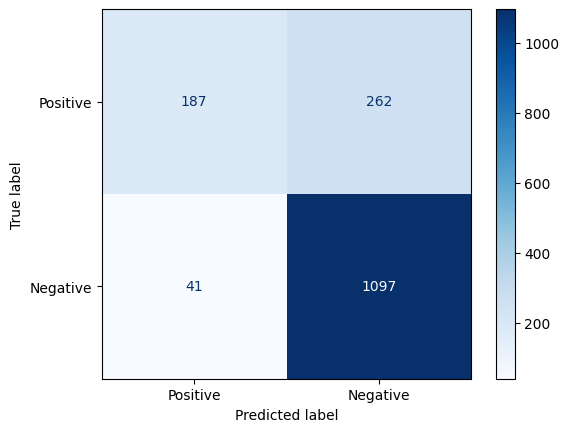

In [36]:
cm = confusion_matrix(y_test, y_pred_bm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
disp.plot(cmap='Blues', values_format='d')


In [37]:
bc = BornClassifier(a=0.5, b=1, h=1)
bc.fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
print(classification_report(y_test, y_pred_bc, zero_division=0))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       449
           1       0.92      0.92      0.92      1138

    accuracy                           0.89      1587
   macro avg       0.86      0.86      0.86      1587
weighted avg       0.89      0.89      0.89      1587



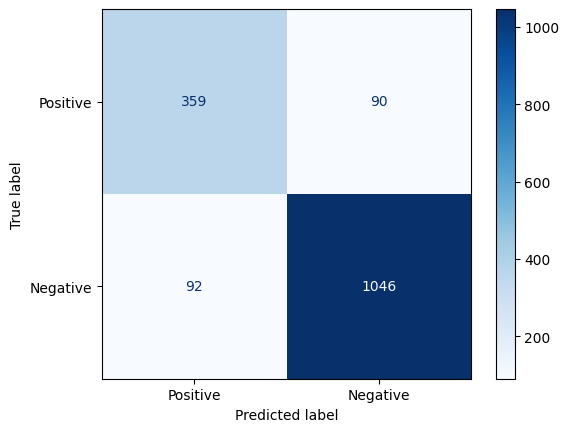

In [38]:
cm = confusion_matrix(y_test, y_pred_bc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
disp.plot(cmap='Blues', values_format='d')


In [39]:
# bc = BornClassifier(a=0.1, b=0.8, h=1)
# bc.fit(X_train, y_train)
# y_pred_ex = bc.predict(X_test)
# print(classification_report(y_test, y_pred_ex, zero_division=0))

In [40]:
# cm = confusion_matrix(y_test, y_pred_ex)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
# disp.plot(cmap='Blues', values_format='d')


In [41]:
# Best parameters found:  {'a': 0.1, 'b': 1.0, 'h': 0.01}

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# param_grid = {
#     'a': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Values between 0 and 10
#     'b': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Same for 'b'
#     'h': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]   # And for 'h'
# }

# # Create the BornClassifier instance
# bc = BornClassifier()

# # Use GridSearchCV to find the best combination of hyperparameters
# grid_search = GridSearchCV(bc, param_grid, scoring='f1_macro', cv=5)  # Adjust 'scoring' as needed
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Get the best model and make predictions on the test set
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)

# # Evaluate performance of the model
# print(classification_report(y_test, y_pred_best, zero_division=0))


## Explaining features

In [42]:
explanation = bc.explain()
print(explanation)

  (0, 1)	0.005984394495015855
  (1, 0)	0.0010840022642640145
  (1, 1)	0.002627372211273439
  (2, 1)	0.011846906002922456
  (3, 1)	0.0099270699010583
  (4, 1)	0.0036940809236233802
  (5, 1)	0.0064589685346426624
  (6, 1)	0.01041707612877925
  (7, 0)	3.802840407856059e-05
  (7, 1)	3.572882781118877e-05
  (8, 1)	0.0028021531850953626
  (9, 1)	0.007216810438027211
  (10, 0)	0.0024726959308933026
  (10, 1)	0.0018486083118572356
  (11, 1)	0.010274525838733055
  (12, 1)	0.007315072545334451
  (13, 0)	0.004012204586610286
  (13, 1)	0.009334506111913615
  (14, 0)	0.010426685306156392
  (15, 0)	0.008598497642678471
  (16, 0)	0.00726415694449912
  (17, 1)	0.004578995612228392
  (18, 0)	0.0002981248702579671
  (18, 1)	0.00025096580980033125
  (19, 0)	0.0015562516606480192
  :	:
  (7509, 0)	0.00034728312506191546
  (7509, 1)	0.00029923411691228693
  (7510, 0)	0.003918793230449428
  (7511, 0)	0.004359431093699088
  (7512, 1)	0.003412937667722057
  (7513, 0)	7.149147485884637e-05
  (7513, 1)	6.264294

In [73]:
from scipy.sparse import csr_matrix

explan_df = pd.DataFrame(csr_matrix(explanation).todense(), columns=["Negative", "Positive"])
tokens = tfidf_vectorizer.get_feature_names_out()
explan_df["Tokens"] = tokens
explan_df.head()

,Negative,Positive,Tokens
0,0.000000,0.005984,aa
1,0.001084,0.002627,aaa
2,0.000000,0.011847,aap
3,0.000000,0.009927,aaron
4,0.000000,0.003694,abbi


In [74]:
explan_df = explan_df[(explan_df["Negative"]!=0) | (explan_df["Positive"]!=0)]
explan_df.head()

,Negative,Positive,Tokens
0,0.000000,0.005984,aa
1,0.001084,0.002627,aaa
2,0.000000,0.011847,aap
3,0.000000,0.009927,aaron
4,0.000000,0.003694,abbi


In [75]:
# Find top tokens for each sentiment class
top_negatives = explan_df.sort_values(by="Negative", ascending=False).head(10)
top_positives = explan_df.sort_values(by="Positive", ascending=False).head(10)

print("Top Negative Tokens:")
print(top_negatives[["Tokens", "Negative"]])

print("\nTop Positive Tokens:")
print(top_positives[["Tokens", "Positive"]])

Top Negative Tokens:
        Tokens  Negative
6622  terrible  0.052396
7432     worst  0.041953
7408      wont  0.041408
972       cant  0.041256
1949    doesnt  0.039171
1550     crash  0.038397
6099      slow  0.038264
3111  horrible  0.037497
4907      poor  0.037376
1553  crashing  0.035105

Top Positive Tokens:
         Tokens  Positive
2058       easy  0.175315
2877      great  0.126628
3890       love  0.105355
2450       fast  0.084642
2307  excellent  0.082300
697        best  0.080167
4340       nice  0.075362
2839       good  0.070860
5190      quick  0.068503
3031    helpful  0.064672


##Other models

In [45]:
# SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Logreg
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(max_iter=300,  multi_class='multinomial')

log_reg_classifier.fit(X_train, y_train)

y_pred_log_reg = log_reg_classifier.predict(X_test)
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       449
           1       0.92      0.94      0.93      1138

    accuracy                           0.90      1587
   macro avg       0.88      0.87      0.88      1587
weighted avg       0.90      0.90      0.90      1587

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       449
           1       0.91      0.96      0.93      1138

    accuracy                           0.90      1587
   macro avg       0.89      0.86      0.87      1587
weighted avg       0.90      0.90      0.90      1587



##**Try Ngrams**

In [46]:
vectorizer2 = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=5,
    ngram_range=(1, 2)
)

X_train2 = vectorizer2.fit_transform(dffin["clean"])
X_test2 = vectorizer2.transform(dftest["clean"])


In [47]:
bc = BornClassifier(a=0.5, b=1, h=1)
bc.fit(X_train2, y_train)
y_pred_bc2 = bc.predict(X_test2)
print(classification_report(y_test, y_pred_bc2, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       449
           1       0.94      0.89      0.91      1138

    accuracy                           0.87      1587
   macro avg       0.84      0.86      0.85      1587
weighted avg       0.88      0.87      0.88      1587



In [ ]:
cm = confusion_matrix(y_test, y_pred_bc2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')

In [49]:
explanation2 = bc.explain()
print(explanation2)

  (0, 1)	0.010868928461464623
  (1, 0)	1.6217670368860946e-07
  (1, 1)	1.6151392599375532e-07
  (2, 0)	0.0056660514862909616
  (2, 1)	0.003707176919971894
  (3, 0)	0.0003002130083961711
  (3, 1)	0.0002414005156295423
  (4, 0)	6.794062476059042e-05
  (4, 1)	6.213604039599788e-05
  (5, 1)	0.009463691973322442
  (6, 0)	0.0002675679410915714
  (6, 1)	0.00022601583999207382
  (7, 0)	0.0027066273447288445
  (7, 1)	0.0047444025095170405
  (8, 0)	1.07152289414365e-07
  (8, 1)	1.0748095012608476e-07
  (9, 0)	0.0005369890697174072
  (9, 1)	0.0006378814668413187
  (10, 1)	0.009979616122275475
  (11, 1)	0.019016819345111423
  (12, 0)	0.005261739768732536
  (12, 1)	0.0023943021223811283
  (13, 0)	0.02265131917865707
  (13, 1)	0.0067899229805018935
  (14, 0)	0.0012032891787585682
  :	:
  (2737, 0)	0.003117394541226752
  (2737, 1)	0.007986047257597792
  (2738, 0)	4.8222800149413436e-05
  (2738, 1)	5.029800837307132e-05
  (2739, 0)	0.0011005996111776134
  (2739, 1)	0.0018665668173746838
  (2740, 0)	2.

In [50]:
explanation_df2 = pd.DataFrame(csr_matrix(explanation2).todense(), columns=["Negative", "Positive"])
tokens = vectorizer2.get_feature_names_out()
explanation_df2["Tokens"] = tokens
explanation_df2.head(20)

,Negative,Positive,Tokens
0,0.000000e+00,1.086893e-02,aaron
1,1.621767e-07,1.615139e-07,ability
2,5.666051e-03,3.707177e-03,able
3,3.002130e-04,2.414005e-04,able make
4,6.794062e-05,6.213604e-05,able shop
5,0.000000e+00,9.463692e-03,able track
6,2.675679e-04,2.260158e-04,able use
7,2.706627e-03,4.744403e-03,abroad
8,1.071523e-07,1.074810e-07,absolute
9,5.369891e-04,6.378815e-04,absolutely


In [76]:
explanation_df2 = explanation_df2[(explanation_df2["Negative"]!=0) | (explanation_df2["Positive"]!=0)]

,Negative,Positive,Tokens
0,0.000000e+00,1.086893e-02,aaron
1,1.621767e-07,1.615139e-07,ability
2,5.666051e-03,3.707177e-03,able
3,3.002130e-04,2.414005e-04,able make
4,6.794062e-05,6.213604e-05,able shop


In [77]:
top_negatives = explanation_df2.sort_values(by="Negative", ascending=False).head(10)
top_positives = explanation_df2.sort_values(by="Positive", ascending=False).head(10)

print("Top Negative Tokens:")
print(top_negatives[["Tokens", "Negative"]])

print("\nTop Positive Tokens:")
print(top_positives[["Tokens", "Positive"]])

Top Negative Tokens:
           Tokens  Negative
2392     terrible  0.049564
658   doesnt work  0.044748
2234         slow  0.044356
234           bad  0.044283
2722        worst  0.043105
539         crash  0.042494
686        driver  0.041881
2700         wont  0.041133
784         error  0.040856
753         email  0.038933

Top Positive Tokens:
         Tokens  Positive
702        easy  0.147756
736    easy use  0.109602
1042      great  0.094411
1407       love  0.084826
1043  great app  0.075673
265        best  0.072983
871        fast  0.072586
800   excellent  0.070948
1562       nice  0.067789
316   brilliant  0.060377


## Aspect definition

In [51]:
for aspect_column in ['account management', 'company brand', 'logistics rides',
                      'online experience', 'purchase booking experience',
                      'staff support', 'value']:
    count = dffin[[aspect_column]].sum()
    print(count)


account management    473
dtype: int64
company brand    3427
dtype: int64
logistics rides    1002
dtype: int64
online experience    3600
dtype: int64
purchase booking experience    2364
dtype: int64
staff support    1171
dtype: int64
value    1374
dtype: int64


In [53]:
X_dummies = dffin[['account management', 'company brand', 'logistics rides', 'online experience', 'purchase booking experience', 'staff support', 'value']]
X_traina_ = pd.concat([pd.DataFrame(X_train2.toarray()), X_dummies.reset_index(drop=True)], axis=1)

In [54]:
X_traina = X_traina_.iloc[:, :-7]
y_traina = X_traina_.iloc[:, -7:]

In [55]:
X_dummies_t = dftest[['account management', 'company brand', 'logistics rides', 'online experience', 'purchase booking experience', 'staff support', 'value']]

X_testa_ = pd.concat([pd.DataFrame(X_test2.toarray()), X_dummies_t.reset_index(drop=True)], axis=1)

In [56]:
X_testa_.head()

,0,1,2,3,4,5,6,7,8,9,...,2747,2748,2749,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,1,0,0


In [59]:
X_testa = X_testa_.iloc[:, :-7]

# Targets (dummy variables)
y_testa = X_testa_.iloc[:, -7:]

In [60]:
y_testa

,account management,company brand,logistics rides,online experience,purchase booking experience,staff support,value
0,0,0,0,0,1,0,0
1,0,0,0,1,1,1,1
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
1582,0,0,0,0,0,1,0
1583,0,0,1,0,1,0,0
1584,0,0,0,1,1,0,0
1585,0,0,0,1,0,0,0


In [61]:
y_traina = y_traina.values
y_testa = y_testa.values

In [62]:
n_aspects = y_traina.shape[1]

models = []

for i in range(n_aspects):
    bc_model = BornClassifier(a=0.5, b=1, h=1)
    bc_model.fit(X_traina, y_traina[:, i])
    models.append(bc_model)

In [63]:
y_preda = []

for model in models:
    y_pred_aspect = model.predict(X_testa)
    y_preda.append(y_pred_aspect)

y_preda = np.column_stack(y_preda)

In [64]:
print(classification_report(y_testa, y_preda, zero_division=0))


              precision    recall  f1-score   support

           0       0.32      0.90      0.47        79
           1       0.70      0.72      0.71       692
           2       0.49      0.86      0.62       189
           3       0.83      0.89      0.86       724
           4       0.66      0.87      0.75       503
           5       0.55      0.88      0.67       224
           6       0.57      0.90      0.70       288

   micro avg       0.64      0.84      0.73      2699
   macro avg       0.59      0.86      0.68      2699
weighted avg       0.67      0.84      0.74      2699
 samples avg       0.70      0.86      0.73      2699



In [65]:
import pandas as pd
from scipy.sparse import csr_matrix

aspects = ['account management', 'company brand', 'logistics rides', 'online experience',
           'purchase booking experience', 'staff support', 'value']

explanations = []

tokens = vectorizer2.get_feature_names_out()

final_explanation_df = pd.DataFrame({'Tokens': tokens})

for i, model in enumerate(models):
    explanation2 = model.explain()
    explanation_df = pd.DataFrame(csr_matrix(explanation2).todense(), columns=[f'{aspects[i]}_no', f'{aspects[i]}_yes'])  # Handle both columns

    explanation_df["Tokens"] = tokens

    final_explanation_df = final_explanation_df.merge(explanation_df, on='Tokens', how='outer')

final_explanation_df.head(20)


,Tokens,account management_no,account management_yes,company brand_no,company brand_yes,logistics rides_no,logistics rides_yes,online experience_no,online experience_yes,purchase booking experience_no,purchase booking experience_yes,staff support_no,staff support_yes,value_no,value_yes
0,aaron,0.009540,0.000000,0.001851,0.001103,0.000176,0.000150,0.008008,0.002099,1.106142e-02,0.000000e+00,0.000000,0.023981,0.002203,0.001202
1,ability,0.004687,0.011299,0.004988,0.002390,0.000328,0.000273,0.003239,0.009178,1.144797e-05,1.106202e-05,0.001463,0.000984,0.001524,0.001019
2,able,0.000050,0.000052,0.000021,0.000021,0.003196,0.002244,0.000505,0.000583,7.981040e-05,8.437549e-05,0.000108,0.000101,0.000007,0.000007
3,able make,0.007975,0.000000,0.000745,0.001144,0.000747,0.001107,0.000002,0.000002,1.142120e-03,1.971078e-03,0.000269,0.000338,0.001545,0.002913
4,able shop,0.011482,0.000000,0.003723,0.001868,0.003794,0.001768,0.002189,0.013370,4.437023e-05,4.784198e-05,0.012065,0.000000,0.005333,0.002063
5,able track,0.008307,0.000000,0.001080,0.000710,0.002339,0.005305,0.000052,0.000048,2.211634e-03,5.931331e-03,0.000830,0.000566,0.002052,0.004423
6,able use,0.002976,0.005919,0.008838,0.002659,0.002386,0.001366,0.000272,0.000229,3.393962e-04,2.787580e-04,0.006967,0.002239,0.002587,0.005111
7,abroad,0.010309,0.003878,0.001348,0.001868,0.001561,0.001136,0.002260,0.001568,5.124858e-04,6.183838e-04,0.003276,0.002049,0.000070,0.000074
8,absolute,0.016373,0.000000,0.003893,0.016315,0.016993,0.000000,0.009153,0.003496,1.163297e-03,8.494342e-04,0.000140,0.000156,0.000417,0.000345
9,absolutely,0.025536,0.003734,0.003432,0.005606,0.017789,0.005464,0.000149,0.000163,6.108590e-05,5.789618e-05,0.000151,0.000139,0.000976,0.000787


In [68]:
for aspect in aspects:
    yes_column = f'{aspect}_yes'
    no_column = f'{aspect}_no'

    if yes_column in final_explanation_df.columns:
        top_yes_tokens = final_explanation_df[['Tokens', yes_column]].sort_values(by=yes_column, ascending=False).head(10)
        print(f"Top 10 Tokens for Aspect: {aspect}")
        print(top_yes_tokens)

    # if no_column in final_explanation_df.columns:
    #     top_no_tokens = final_explanation_df[['Tokens', no_column]].sort_values(by=no_column, ascending=False).head(10)
    #     print(f"Top 10 Tokens for Aspect: {aspect} (No)")
    #     print(top_no_tokens)
    #     print("\n")

Top 10 Tokens for Aspect: account management
        Tokens  account management_yes
2211      sign                0.192795
1728  password                0.159712
22     account                0.159632
1375       log                0.134533
1379     login                0.114713
928     forgot                0.087918
2622    verify                0.079493
1996  register                0.076533
542     create                0.072213
1867   profile                0.071670
Top 10 Tokens for Aspect: company brand
                Tokens  company brand_yes
265               best           0.090853
257          beautiful           0.056914
1899           quality           0.049728
1413          love org           0.041497
828         experience           0.038944
1053  great experience           0.035048
909                fit           0.034918
1010   good experience           0.033504
1972         recommend           0.032640
439            clothes           0.030229
Top 10 Tokens for Aspect

##Random attempts

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# y_traina_bin = mlb.fit_transform(y_traina)
# y_testa_bin = mlb.transform(y_testa)

In [ ]:
# bc_a = BornClassifier(a=0.5, b=1, h=1).fit(X_traina, y_traina_bin)
# y_pred_bca = bc_a.predict_proba(X_testa)
# print(y_pred_bca.shape)

In [ ]:
# from sklearn.cluster import KMeans

# num_clusters = 7  # Adjust based on the number of aspects you want to identify
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(X_train)

# # Get cluster centroids and feature names
# cluster_centers = kmeans.cluster_centers_
# feature_names = tfidf_vectorizer.get_feature_names_out()

# # Get top words for each cluster
# num_words = 10
# clusters = {}
# for i, center in enumerate(cluster_centers):
#     top_words = [feature_names[j] for j in center.argsort()[-num_words:]]
#     clusters[f'Cluster_{i}'] = top_words

# for cluster, words in clusters.items():
#     print(f"{cluster}: {', '.join(words)}")


In [ ]:
# y_train_a = exploded_df["label1"].apply(preprocess)
# y_train_a = tfidf_vectorizer.fit_transform(exploded_df["label1"])

In [ ]:
# y_test_a = exploded_test["label1"].apply(preprocess)
# y_test_a = tfidf_vectorizer.transform(exploded_test["label1"])

In [ ]:
# bca = BornClassifier()
# bca.fit(X_train, y_train_a)
# y_pred_bca = bca.predict(X_test)
# print(classification_report(y_test_a, y_pred_bca, zero_division=0))

In [ ]:
# print(type(y_test_a), type(y_pred_bca))
# print(y_test_a[:10])  # Print a few values to inspect
# print(y_pred_bca[:10])

In [ ]:
# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk import pos_tag
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# # Define function to preprocess and filter text
# def filter_nouns(tokens):
#     # Perform POS tagging
#     tagged_tokens = pos_tag(tokens)

#     # Keep only nouns and verbs
#     filtered_tokens = [word for word, tag in tagged_tokens if tag.startswith('N')]

#     return ' '.join(filtered_tokens)  # Join back into a single string

# # Apply preprocessing to each row in 'clean' column
# def process_clean_column(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text.lower())
#         filtered_text = filter_nouns(tokens)
#     elif isinstance(text, list):
#         filtered_text = filter_nouns(text)
#     else:
#         filtered_text = ''

#     return filtered_text

# # Create 'clean2' column
# dff['clean2'] = dff['clean'].apply(process_clean_column)


In [ ]:
# import string
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Preprocessing step (if the 'clean2' column contains raw text)
# if isinstance(dff['clean2'].iloc[0], str):
#     # If the 'clean2' column contains raw text, tokenize
#     def preprocess(text):
#         tokens = word_tokenize(text.lower())
#         tokens = [word for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
#         return tokens

#     # Apply preprocessing to each text in 'clean2' column
#     tokenized_texts = dff['clean2'].apply(preprocess).tolist()
# else:
#     # Assume 'clean2' is already a list of tokens
#     tokenized_texts = dff['clean2'].tolist()

# # Join tokenized texts back into string format for CountVectorizer
# texts_for_vectorizer = [' '.join(tokens) for tokens in tokenized_texts]

# # Use CountVectorizer to create the document-term matrix
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# doc_term_matrix = vectorizer.fit_transform(texts_for_vectorizer)

# # Train LDA model
# num_topics = 10  # Number of topics you want to extract
# lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
# lda.fit(doc_term_matrix)

# # Get the top words for each topic
# num_words = 5  # Number of top words per topic
# words = vectorizer.get_feature_names_out()

# # Display the top words for each topic
# for topic_idx, topic in enumerate(lda.components_):
#     print(f"Topic {topic_idx}:")
#     print(" ".join([words[i] for i in topic.argsort()[:-num_words - 1:-1]]))


## Associate sentences to aspects


In [80]:
aspect_tokens = {
    'account management': ['sign', 'password', 'account', 'log', 'login', 'forgot', 'verify', 'register', 'create', 'profile'],
    'company brand': ['best', 'beautiful', 'quality', 'love org', 'experience', 'great experience', 'fit', 'good experience', 'recommend', 'clothes'],
    'logistics rides': ['fast', 'quick', 'delivery', 'slow', 'quick easy', 'fast delivery', 'easy quick', 'quickly', 'arrived', 'super fast'],
    'online experience': ['app', 'great app', 'application', 'love app', 'good app', 'app easy', 'excellent app', 'update', 'apps', 'app good'],
    'purchase booking experience': ['easy', 'easy use', 'app easy', 'use', 'user friendly', 'card', 'navigate', 'easy quick', 'simple', 'easy navigate'],
    'staff support': ['customer service', 'customer', 'support', 'staff', 'chat', 'spoke', 'patient', 'service', 'email', 'polite'],
    'value': ['price', 'discount', 'free', 'deal', 'saved', 'offer', 'cheaper', 'cheapest', 'great deal', 'good deal']
}

for aspect in aspect_tokens.keys():
    dffin[f'{aspect}_sentiment'] = None  # Placeholder columns for each aspect's sentiment

def process_row(row):
    sentence = row['text']
    tokenized_sentence = word_tokenize(sentence.lower())

    aspect_sentiment_predictions = {}

    # Loop over each aspect and check for relevant tokens
    for aspect, tokens in aspect_tokens.items():
        if any(token in tokenized_sentence for token in tokens):
            vectorized_sentence = vectorizer2.transform([sentence])  # Vectorize the sentence
            aspect_model = models[list(aspect_tokens.keys()).index(aspect)]  # Get corresponding Born classifier
            sentiment_prediction = aspect_model.predict(vectorized_sentence)  # Predict sentiment

            row[f'{aspect}_sentiment'] = 'Positive' if sentiment_prediction[0] == 1 else 'Negative'

    return row

df = dffin.apply(process_row, axis=1)

df.head()


,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,aspects,...,purchase booking experience,staff support,value,account management_sentiment,company brand_sentiment,logistics rides_sentiment,online experience_sentiment,purchase booking experience_sentiment,staff support_sentiment,value_sentiment
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","[staff-support.attitude-of-staff.-1, company-b...",experience around parking forum review based s...,118,"[staff support, company brand, company brand]",...,0,1,0,None,Positive,None,None,None,Positive,Negative
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","[company-brand.general-satisfaction.1, company...",love handy plus hate bank take away alot business,9,"[company brand, company brand]",...,0,0,0,None,None,None,None,None,None,None
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",[company-brand.general-satisfaction.-1],sometimes take,2,[company brand],...,0,0,0,None,None,None,None,None,None,None
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","[logistics-rides.speed.-1, online-experience.a...",worst app ordered sneaker week ago still haven...,17,"[logistics rides, online experience, company b...",...,0,0,0,None,None,None,Positive,None,None,None
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",[company-brand.general-satisfaction.1],easy load info,3,[company brand],...,0,0,0,None,None,None,None,Positive,None,None


In [ ]:
# from nltk.tokenize import sent_tokenize

# sentences = sent_tokenize(text)

In [ ]:
# aspect_sentences = []
# for sentence in sentences:
#     for token in pricing_aspects:
#         if token in sentence.lower():
#             aspect_sentences.append((sentence, 'XXXXXXXXXX'))
#             break

In [ ]:
# sentence_vectors = tfidf_vectorizer.transform(aspect_sentences)
# aspect_sentiments = bc.predict(sentence_vectors)
# for aspect, sentiment in zip(aspect_sentences, aspect_sentiments):
#     print(f"Aspect: {aspect[1]} | Sentence: {aspect[0]} | Sentiment: {sentiment}")

In [ ]:
# Pipeline example

# # Step 3: Create a TF-IDF vectorizer and SVM pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('svm', OneVsRestClassifier(SVC(kernel='linear', probability=True)))
# ])

# # Step 4: Train the model
# pipeline.fit(X_train, y_train)

# # Step 5: Make predictions
# y_pred = pipeline.predict(X_test)

# # Step 6: Evaluate the model
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Optional: Hyperparameter tuning can be added here using GridSearchCV
